# Titanic projesini Keras&DeepLearning ile çözmeye çalışıyoruz.

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('titanichazirveri.csv')

In [ ]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0,1,0.0,3,22.0,1,0,7.2500,0,2,True,False,True,False,True,False
1,1,2,1.0,1,38.0,1,0,71.2833,0,2,False,False,False,False,False,True
2,2,3,1.0,3,26.0,0,0,7.9250,0,1,False,False,True,True,False,False
3,3,4,1.0,1,35.0,1,0,53.1000,0,2,False,False,True,False,False,True
4,4,5,0.0,3,35.0,0,0,8.0500,0,1,True,False,True,False,True,False


In [ ]:
del df['Unnamed: 0']

In [ ]:
train=df[:891]
test=df[891:]

In [ ]:
del test['Survived']

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Senior         0
Family         0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Title_Miss     0
Title_Mr       0
Title_Mrs      0
dtype: int64

In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x = x.astype(np.float32)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
model=Sequential()

model.add(Dense(240,activation='relu'))

model.add(Dense(120,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(30,activation='relu'))

model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x,y,epochs=250,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/250
23/23 [==============================] - 2s 13ms/step - loss: 1.0932 - accuracy: 0.5154 - val_loss: 0.6938 - val_accuracy: 0.3575
Epoch 2/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5379 - val_loss: 0.6918 - val_accuracy: 0.6425
Epoch 3/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6752 - accuracy: 0.6096 - val_loss: 0.6899 - val_accuracy: 0.6425
Epoch 4/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6695 - accuracy: 0.6096 - val_loss: 0.6886 - val_accuracy: 0.6425
Epoch 5/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.6096 - val_loss: 0.6864 - val_accuracy: 0.6425
Epoch 6/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6860 - accuracy: 0.6096 - val_loss: 0.6847 - val_accuracy: 0.6425
Epoch 7/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.6096 - val_loss: 0.6827 - val_accuracy: 0.6425
Epoch 8/250


In [ ]:
from sklearn.preprocessing import normalize,scale

In [ ]:
x=scale(x)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [ ]:
history=model.fit(x,y,epochs=250,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6217 - accuracy: 0.6096 - val_loss: 0.5435 - val_accuracy: 0.6425
Epoch 2/250
23/23 [==============================] - 0s 4ms/step - loss: 0.5893 - accuracy: 0.6096 - val_loss: 0.5091 - val_accuracy: 0.6425
Epoch 3/250
23/23 [==============================] - 0s 5ms/step - loss: 0.5720 - accuracy: 0.6096 - val_loss: 0.5580 - val_accuracy: 0.6425
Epoch 4/250
23/23 [==============================] - 0s 5ms/step - loss: 0.5620 - accuracy: 0.6096 - val_loss: 0.4971 - val_accuracy: 0.6425
Epoch 5/250
23/23 [==============================] - 0s 4ms/step - loss: 0.5579 - accuracy: 0.6096 - val_loss: 0.5216 - val_accuracy: 0.6425
Epoch 6/250
23/23 [==============================] - 0s 4ms/step - loss: 0.5545 - accuracy: 0.6096 - val_loss: 0.5128 - val_accuracy: 0.6425
Epoch 7/250
23/23 [==============================] - 0s 5ms/step - loss: 0.5420 - accuracy: 0.6096 - val_loss: 0.4872 - val_accuracy: 0.6425
Epoch 8/250
2

In [ ]:
score=model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.9226


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 240)               3600      
                                                                 
 dense_8 (Dense)             (None, 120)               28920     
                                                                 
 dense_9 (Dense)             (None, 64)                7744      
                                                                 
 dense_10 (Dense)            (None, 30)                1950      
                                                                 
 dense_11 (Dense)            (None, 20)                620       
                                                                 
 dense_12 (Dense)            (None, 4)                 84        
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
import matplotlib.pyplot as plt

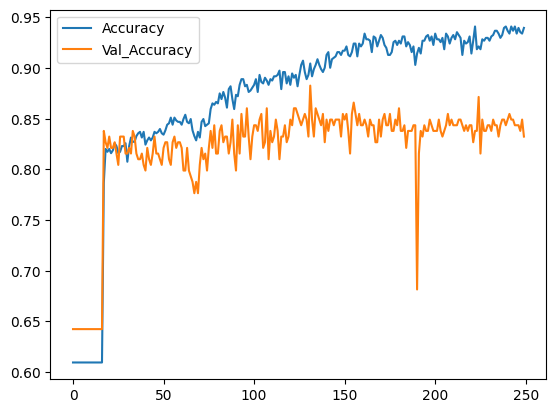

In [ ]:
plt.plot(history.history['accuracy'],label='Accuracy')

plt.plot(history.history['val_accuracy'],label='Val_Accuracy')

plt.legend()

In [ ]:
model=Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(550,activation='relu'))
model.add(Dense(325,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
model.fit(x,y,epochs=1000,batch_size=32,verbose=1)

Epoch 1/1000
28/28 [==============================] - 3s 12ms/step - loss: 0.5123 - accuracy: 0.7710
Epoch 2/1000
28/28 [==============================] - 0s 13ms/step - loss: 0.4178 - accuracy: 0.8305
Epoch 3/1000
28/28 [==============================] - 0s 12ms/step - loss: 0.3938 - accuracy: 0.8249
Epoch 4/1000
28/28 [==============================] - 0s 11ms/step - loss: 0.3806 - accuracy: 0.8440
Epoch 5/1000
28/28 [==============================] - 0s 12ms/step - loss: 0.3737 - accuracy: 0.8339
Epoch 6/1000
28/28 [==============================] - 0s 11ms/step - loss: 0.3541 - accuracy: 0.8474
Epoch 7/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.3613 - accuracy: 0.8440
Epoch 8/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.3430 - accuracy: 0.8530
Epoch 9/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.3413 - accuracy: 0.8530
Epoch 10/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.3434 - accuracy: 

In [ ]:
score=model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9854


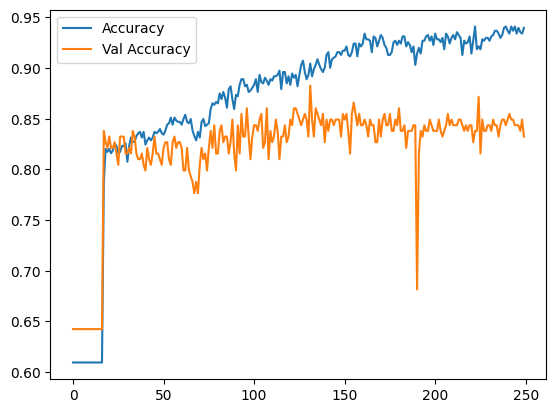

In [ ]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend()